# Lab 1

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

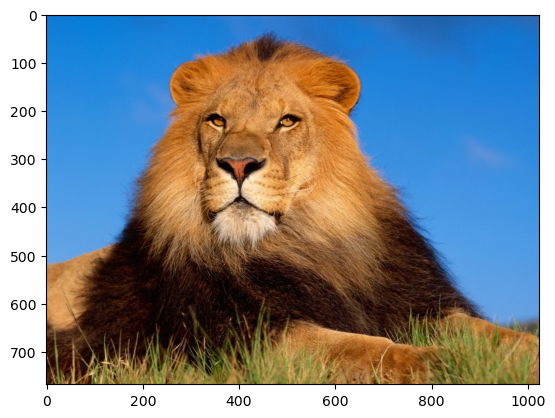

In [4]:
# Imagen para problema 1
img_1 = cv2.imread("ej1.jpg")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)
plt.show()

In [5]:
def img_reader(img, col_code):
    # lienzo en blanco
    img_out = np.zeros_like(img)
    match col_code:
        case 1:
            mask = [0, 0, 1]
        case 2:
            mask = [0, 1, 0]
        case 3:
            mask = [1, 0, 0]
        case 10:
            mask = [1, 1, 0]
        case 20:
            mask = [0, 1, 1]
        case 30:
            mask = [1, 0, 1]
        case _:
            mask = [1, 1, 1]
    img_out = img*mask 
    return img_out

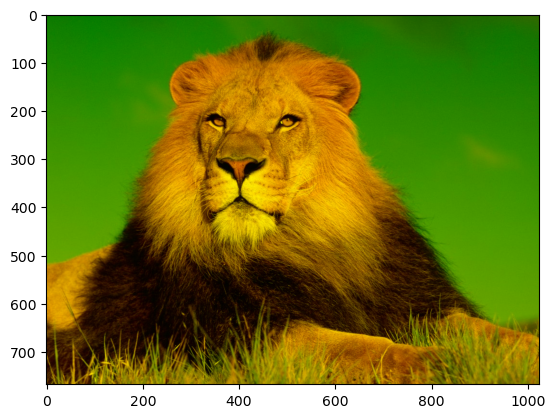

In [6]:
ejercicio1 = img_reader(img_1, 10)
plt.imshow(ejercicio1)
plt.show()

## Problema 2

In [11]:
def img3Dreader(path_name):
    filepath = os.path.join(os.getcwd(), path_name)
    files = os.listdir(filepath)
    for file in files:
        filename = os.path.join(filepath, file)
        if 'verde' in filename:
            img_g = cv2.imread(filename)
        elif 'rojo' in filename:
            img_r = cv2.imread(filename)
        else:
            img_b = cv2.imread(filename)
    return img_r, img_g, img_b

In [13]:
def image3Dmerger(red_img, green_img, blue_img):
    img_nueva = red_img*[1,0,0] + green_img*[0,1,0] + blue_img*[0,0,1]
    return img_nueva

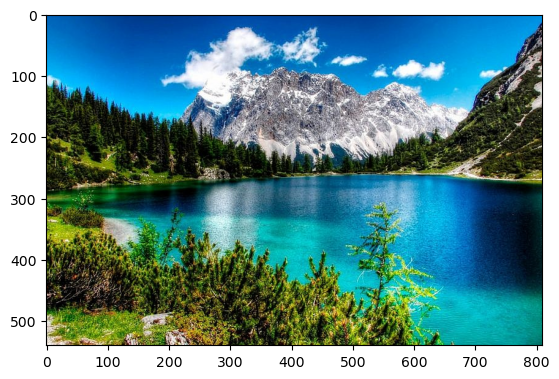

In [15]:
img1_r, img1_g, img1_b = img3Dreader('imagen1')
img1_nueva = image3Dmerger(img1_r, img1_g, img1_b)
plt.imshow(img1_nueva)
plt.show()

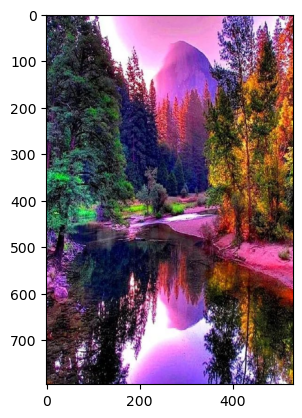

In [17]:
img2_r, img2_g, img2_b = img3Dreader('imagen2')
img2_nueva = image3Dmerger(img2_r, img2_g, img2_b)
plt.imshow(img2_nueva)
plt.show()

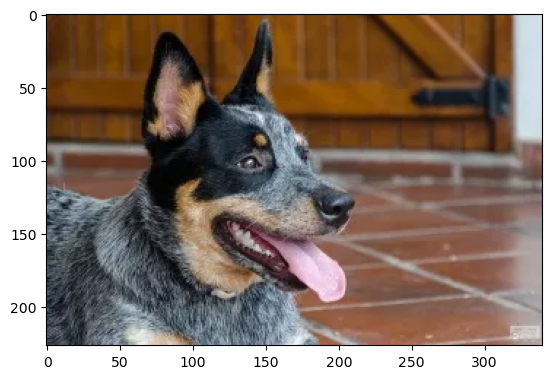

In [23]:
img3_r, img3_g, img3_b = img3Dreader('perro')
img3_nueva = image3Dmerger(img3_r, img3_g, img3_b)
plt.imshow(img3_nueva)
plt.show()